<a href="https://colab.research.google.com/github/ialkamal/food-sales-predictions/blob/master/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions


## Week 1

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/Coding Dojo/Fundamentals_Data_Science/sales_predictions.csv'

sales_ds = pd.read_csv(path)
sales_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Week 2

1) How many rows and columns?

In [3]:
sales_ds.shape

(8523, 12)

2) What are the datatypes of each variable?

In [4]:
sales_ds.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [5]:
sales_ds.duplicated().any()

False

4) Identify missing values.

In [6]:
sales_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
sales_ds.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

**Item Weight**

In [8]:
sales_ds.loc[sales_ds['Item_Weight'].isna(),:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [9]:
item_weight = sales_ds.loc[~sales_ds['Item_Weight'].isna(),["Item_Weight","Item_Type"]]

In [10]:
item_weight.groupby(['Item_Type'])["Item_Weight"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,536.0,12.277108,4.773622,4.880,8.23500,11.650,15.75,20.85
Breads,204.0,11.346936,4.440540,4.635,7.12875,10.600,14.85,20.85
Breakfast,89.0,12.768202,5.038131,6.425,8.06000,10.695,17.25,21.10
Canned,539.0,12.305705,4.586564,4.615,8.11500,12.150,16.25,21.35
Dairy,566.0,13.426069,4.686532,4.805,9.27750,13.350,17.60,20.70
Frozen Foods,718.0,12.867061,4.507383,4.555,8.93500,12.850,17.00,20.85
Fruits and Vegetables,1019.0,13.224769,4.575275,5.460,9.19500,13.100,17.10,21.35
Hard Drinks,183.0,11.400328,4.239144,4.610,8.26000,10.100,14.85,19.70
Health and Hygiene,430.0,13.142314,4.512313,5.175,9.69500,12.150,17.60,21.25


In [11]:
item_weight.groupby(['Item_Type'])["Item_Weight"].std()

Item_Type
Baking Goods             4.773622
Breads                   4.440540
Breakfast                5.038131
Canned                   4.586564
Dairy                    4.686532
Frozen Foods             4.507383
Fruits and Vegetables    4.575275
Hard Drinks              4.239144
Health and Hygiene       4.512313
Household                4.998845
Meat                     4.670812
Others                   4.225534
Seafood                  5.473830
Snack Foods              4.531256
Soft Drinks              4.403699
Starchy Foods            4.010061
Name: Item_Weight, dtype: float64

After reviewing the data, the mean looks like a good measure to fill the missing values as the average weight is very close between different item types as well as the standard deviation is relatively small and consistent, meaning that the item actual weights are close to the mean. 

In [12]:
item_weight['Item_Weight'].mean()

12.857645184136183

In [13]:
sales_ds['Item_Weight'].fillna(item_weight['Item_Weight'].mean(), inplace = True)

In [14]:
sales_ds.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Outlet Size**

In [15]:
sales_ds.groupby(['Outlet_Size',"Outlet_Type"])[["Item_Outlet_Sales"]].describe()

Item_Outlet_Sales  ...            
                                          count  ...         max
Outlet_Size Outlet_Type                          ...            
High        Supermarket Type1             932.0  ...  10256.6490
Medium      Supermarket Type1             930.0  ...   7646.0472
            Supermarket Type2             928.0  ...   6768.5228
            Supermarket Type3             935.0  ...  13086.9648
Small       Grocery Store                 528.0  ...   1482.0708
            Supermarket Type1            1860.0  ...   9779.9362

[6 rows x 8 columns]

In [16]:
outlet_na = sales_ds.loc[sales_ds["Outlet_Size"].isna(),['Outlet_Size',"Outlet_Type","Item_Outlet_Sales"]]

In [17]:
outlet_na.groupby(["Outlet_Type"])[["Item_Outlet_Sales"]].describe()

Item_Outlet_Sales               ...                      
                              count         mean  ...        75%        max
Outlet_Type                                       ...                      
Grocery Store                 555.0   339.351662  ...   455.4072  1775.6886
Supermarket Type1            1855.0  2266.410119  ...  3020.0688  9664.7528

[2 rows x 8 columns]

The features most related to Outlet Size is Outlet Type and Item Outlet Sales.

Observations:
1.  Only Supermarkets Type1 and Grocery Stores have missing values
2.  From the data that is not missing: 
*   All grocery stores have a small size. 
*   Supermarket Type 1 can be either Small, Medium or High
3. I would assume that accounting and reporting would be a bit harder for small sized supermarkets. Medium and Larger sized supermarkets would probably have automated systems to calculate inventory.

Result:
I would think that replacing the missing values with "Small" would be the right way to go.

In [18]:
sales_ds['Outlet_Size'].fillna("Small", inplace = True)

6) Confirm that there are no missing values after addressing them.

In [19]:
sales_ds.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [20]:
sales_ds["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
sales_ds["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [22]:
sales_ds["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [23]:
sales_ds["Outlet_Size"].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [24]:
sales_ds["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [25]:
sales_ds["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Only the "Item Fat Content" column seems to have inconsistent data.

In [26]:
sales_ds["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
f1 = sales_ds["Item_Fat_Content"] == "LF"
f2 = sales_ds["Item_Fat_Content"] == "low fat"
f3 = sales_ds["Item_Fat_Content"] == "reg"
sales_ds.loc[f1 | f2,["Item_Fat_Content"]] = "Low Fat"
sales_ds.loc[f3,["Item_Fat_Content"]] = "Regular"

In [28]:
sales_ds["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
sales_ds.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [30]:
sales_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [31]:
sales_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Week 3

In [32]:
sales_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

1. Histogram to view the distributions of various features in your dataset.

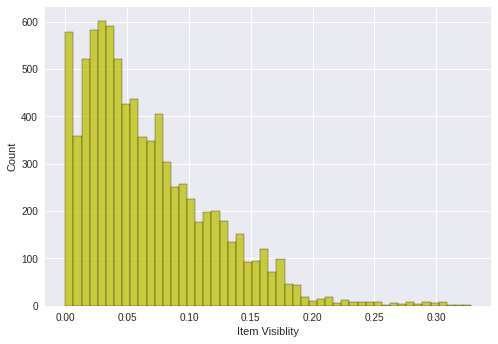

In [74]:
iv = sns.histplot(x="Item_Visibility",data=sales_ds,color='y')
iv.set(xlabel="Item Visiblity")
plt.show()

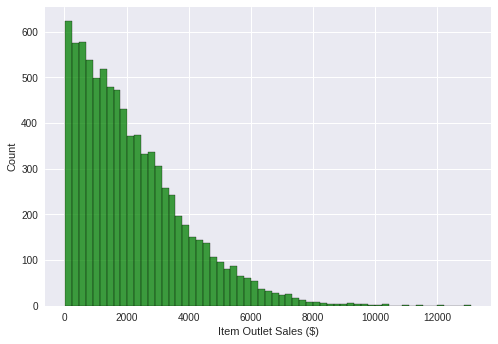

In [75]:
ip = sns.histplot(x="Item_Outlet_Sales",data=sales_ds,color='g')
ip.set(xlabel="Item Outlet Sales ($)")
plt.show()

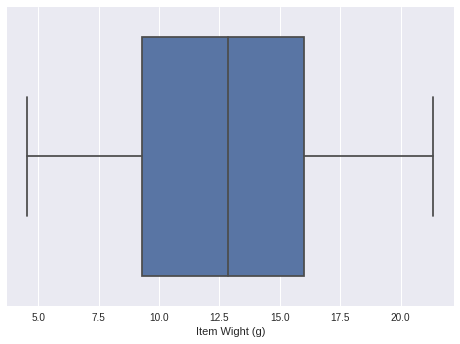

In [76]:
iw = sns.boxplot(x="Item_Weight",data=sales_ds)
iw.set(xlabel="Item Wight (g)")
plt.show()

2. Boxplot to view statistical summaries of various features in your dataset.

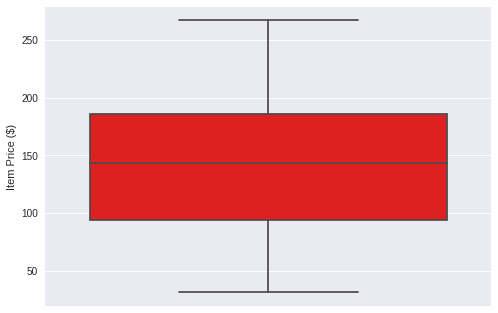

In [77]:
ip = sns.boxplot(y="Item_MRP",data=sales_ds,color='r')
ip.set(ylabel="Item Price ($)")
plt.show()

3. Heatmap of the correlation between features.

In [78]:
corr = sales_ds.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


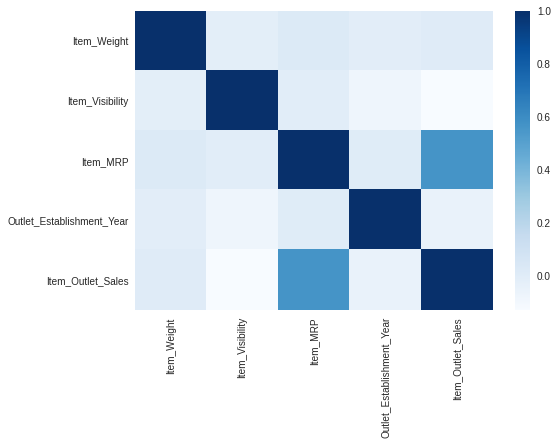

In [79]:
sns.heatmap(corr,cmap="Blues")